In [1]:
import numpy as np
import matplotlib.pyplot as plt
import DataPreprocessing
from functools import reduce

In [18]:
def graph_data(me_filename, mom_filename, comb_str):    
    me = np.load(me_filename, allow_pickle=True) #Matrix elements
    mom_raw = np.load(mom_filename, allow_pickle=True, encoding='bytes') #4-momenta of inputs
    mom_raw = np.array([np.array(element) for element in mom_raw])
    
    #combs = ['1,3','2,3','1,4','2,4','1,2,3','1,2,4','1,3,4','2,3,4']
    #mandel_vars = reduce(np.multiply, DataPreprocessing.mandel_creation(combs, mom_raw))
    #me = np.multiply(me, mandel_vars)
    
    #mandel_vars = reduce(np.multiply, DataPreprocessing.mandel_creation(['1,2'], mom_raw))
    #me = np.multiply(me, mandel_vars)

    return (me, DataPreprocessing.mandel_creation([comb_str], mom_raw)[0])

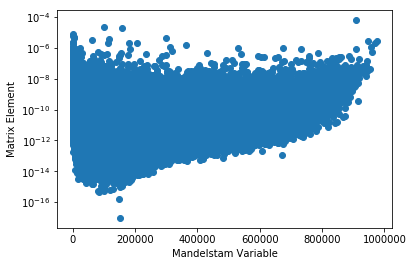

In [19]:
me, S = graph_data('LO/uuuxux/me_1000000.npy', 'LO/uuuxux/mom_1000000.npy', '1,3')
#me, S = graph_data('LO/MG_uuxg_2/me_3jet_1000000.npy', 'LO/MG_uuxg_2/mom_3jet_1000000.npy', '1,3')
#me, S = graph_data('NLO/MG_uuxg/me_1000000.npy', 'NLO/MG_uuxg/mom_1000000.npy', '1,3')

#plt.yscale('log')
#plt.xscale('log')

plt.ylabel('Matrix Element')
plt.xlabel('Mandelstam Variable')
plt.scatter(S, me)

In [11]:
print(max(me))

1.6760680942276067e+76
